<a href="https://colab.research.google.com/github/sreenidhi2545/Iris-Task1/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Iris.csv to Iris (14).csv
 Model Accuracy: 100.0%
 Prediction for flower ➜ Iris-setosa


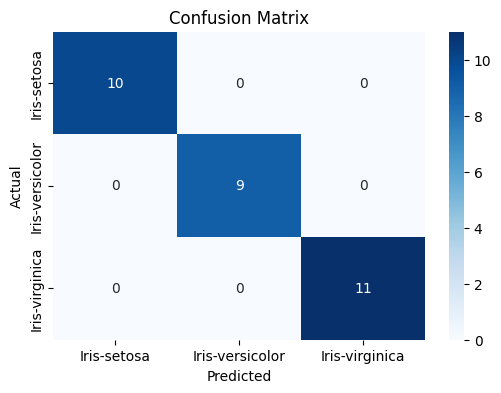

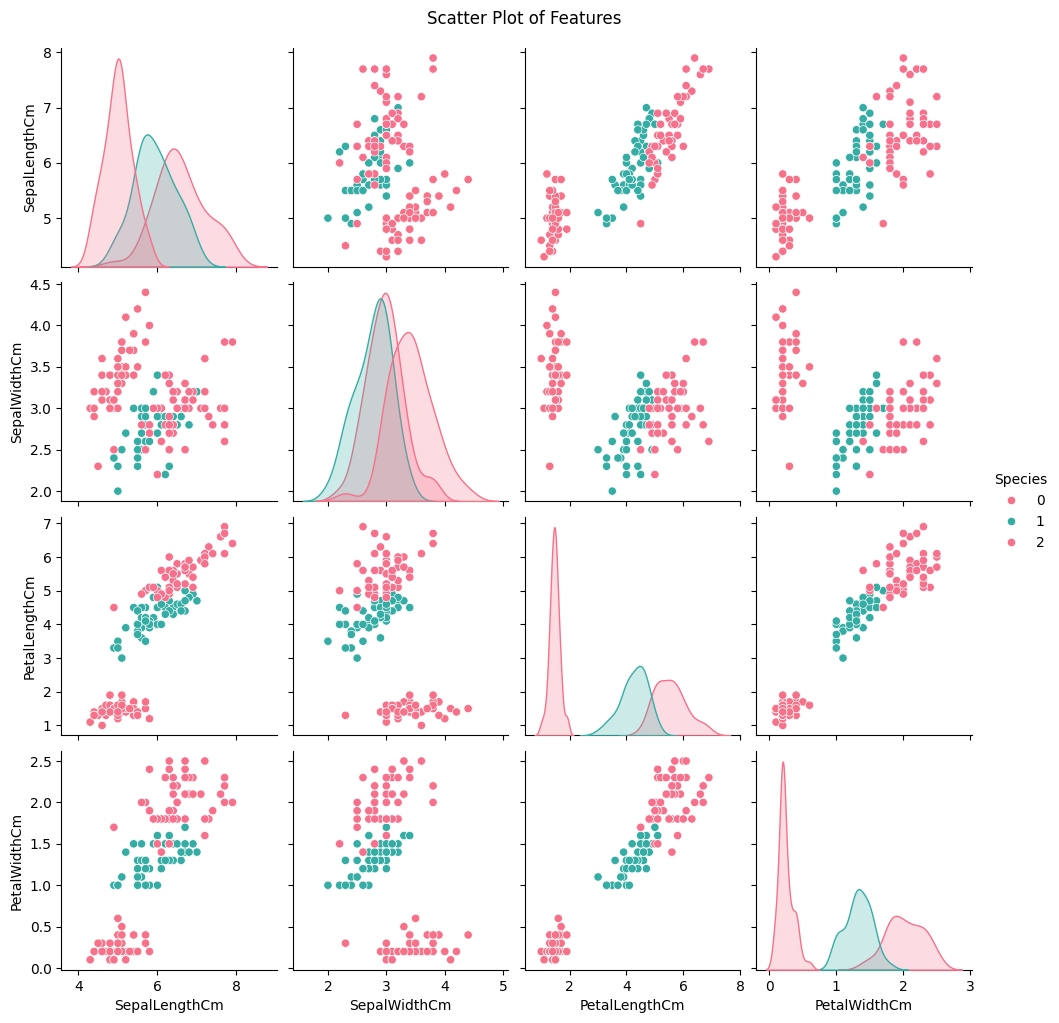

Trained model saved as 'iris_model.pkl'


In [20]:

!pip install -q pandas scikit-learn joblib matplotlib seaborn


from google.colab import files
uploaded = files.upload()

import io
import pandas as pd


filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


if 'Id' in df.columns:
    df = df.drop('Id', axis=1)


le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])


X = df.drop('Species', axis=1)
y = df['Species']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


accuracy = model.score(X_test, y_test)
print(f" Model Accuracy: {accuracy * 100:.1f}%")

sample = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=X.columns)
pred = model.predict(sample)
predicted_species = le.inverse_transform(pred)[0]
print(f" Prediction for flower ➜ {predicted_species}")



import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


sns.pairplot(df, hue="Species", palette="husl")
plt.suptitle("Scatter Plot of Features", y=1.02)
plt.show()


import joblib
joblib.dump(model, 'iris_model.pkl')
print("Trained model saved as 'iris_model.pkl'")
